In [1]:
import librosa
import numpy as np
import pandas as pd
import torch
import os
import pickle
import transformers
import torchvision
from pytorch_pretrained_vit import ViT

In [2]:
model_name = 'B_16_imagenet1k'
model = ViT(model_name, pretrained=True)

Loaded pretrained weights.


In [3]:
with open('data/preprocessed_data_split_nona_03_07.pkl', 'rb') as f:
    train, val, test = pickle.load(f)

In [4]:
val.head()

,emotion,intensity,statement,repeat,gender,mel,mfcc,chromagram,spec_contrast,tonnetz,filename,mel_pad,mfcc_pad,chromagram_pad,spec_contrast_pad,tonnetz_pad
369,2,1,2,2,0,"[[9.50724e-05, 6.8767185e-05, 0.00015295653, 0...","[[-884.38464, -885.6134, -884.1467, -882.37726...","[[0.7087542, 0.47900087, 0.6418329, 0.93395066...","[[24.56065813501899, 16.53363965318033, 21.898...","[[-0.07230143814529716, -0.07546215010665616, ...",03-01-02-01-02-02-08.wav,"[[9.507239883532748e-05, 6.876718543935567e-05...","[[-884.3846435546875, -885.6134033203125, -884...","[[0.7087541818618774, 0.47900086641311646, 0.6...","[[24.56065813501899, 16.53363965318033, 21.898...","[[-0.07230143814529716, -0.07546215010665616, ..."
1255,6,1,1,1,0,"[[1.789445e-06, 1.2919778e-06, 1.0217702e-06, ...","[[-666.02386, -656.1765, -645.44977, -641.7728...","[[0.9456255, 0.52619433, 0.62148577, 0.7980577...","[[16.717965213015603, 18.446617295720543, 40.8...","[[-0.022028304875560848, -0.0190684326124428, ...",03-01-06-01-01-01-10.wav,"[[1.7894450365929515e-06, 1.2919778100695112e-...","[[-666.0238647460938, -656.176513671875, -645....","[[0.9456254839897156, 0.5261943340301514, 0.62...","[[16.717965213015603, 18.446617295720543, 40.8...","[[-0.022028304875560848, -0.0190684326124428, ..."
592,7,1,2,1,0,"[[8.2225015e-13, 2.3429403e-11, 2.0612288e-11,...","[[-778.2969, -778.2969, -778.2969, -778.2969, ...","[[0.94348556, 0.9370095, 0.94074184, 0.9504772...","[[8.039895497077225, 5.939298528871646, 3.8563...","[[-0.16673182857144367, -0.18327695918207515, ...",03-01-07-01-02-01-16.wav,"[[8.222501455754094e-13, 2.342940251531811e-11...","[[-778.296875, -778.296875, -778.296875, -778....","[[0.9434855580329895, 0.9370095133781433, 0.94...","[[8.039895497077225, 5.939298528871646, 3.8563...","[[-0.16673182857144367, -0.18327695918207515, ..."
1290,5,1,2,1,0,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[-668.9862, -668.9862, -668.9862, -668.9862, ...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[20.608299523328014, 20.608299523328014, 20.6...","[[0.1238472328395454, 0.10053637477785138, 0.0...",03-01-05-01-02-01-24.wav,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[-668.9862060546875, -668.9862060546875, -668...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[20.608299523328014, 20.608299523328014, 20.6...","[[0.1238472328395454, 0.10053637477785138, 0.0..."
1240,4,2,2,1,0,"[[3.2012485e-05, 1.0481453e-05, 4.1928706e-06,...","[[-755.72424, -756.8351, -756.4492, -757.50037...","[[0.2619576, 0.43366244, 0.61586565, 0.6568907...","[[15.546648988556463, 15.769111896492403, 17.7...","[[-0.042034618409396124, -0.037828358447922365...",03-01-04-02-02-01-10.wav,"[[3.2012485462473705e-05, 1.0481452591193374e-...","[[-755.7242431640625, -756.8350830078125, -756...","[[0.261957585811615, 0.43366244435310364, 0.61...","[[15.546648988556463, 15.769111896492403, 17.7...","[[-0.042034618409396124, -0.037828358447922365..."


In [5]:
# 256 + 6 + 20 + 12 + 7 = 256 + 45 = 301
print(train['mel_pad'][0].shape)
print(train['tonnetz_pad'][0].shape)
print(train['mfcc_pad'][0].shape)
print(train['chromagram_pad'][0].shape)
print(train['spec_contrast_pad'][0].shape)
print(model.image_size)
print(len(train['mel_pad']))

(256, 250)
(6, 250)
(20, 250)
(12, 250)
(7, 250)
(384, 384)
1152


In [6]:
from torchvision import transforms

# implementing a mel-only version
class TransformerDataset(torch.utils.data.Dataset):
    
    def __init__(self, df):
        self.labels = df['emotion'].reset_index(drop=True)
        self.num_labels = self.labels.nunique()
        self.mels = df['mel_pad'].reset_index(drop=True)
        self.max_len = self.mels[0].shape[1]
        self.transform = transforms.Compose([transforms.ToTensor(), 
                                             transforms.CenterCrop((self.max_len, self.max_len)),
                                             transforms.Resize(model.image_size)])
                                             #transforms.Normalize([0.5, 0.5, 0.5],
                                                                  #[0.5, 0.5, 0.5]),])
        
    def __len__(self):
        return len(self.mels)
    
    def __getitem__(self, idx):
        if torch.is_tensor(idx):
            idx = idx.tolist()
            
        mel = self.mels.iloc[idx]
        label = self.labels.iloc[idx]        
        mel = self.transform(mel)
        # stack the same mel spectrogram three times to emulate RGB image
        mel = torch.stack([mel]*3, dim=1).squeeze(dim=0).type(torch.float)
        label = torch.tensor(label-1).type(torch.long)
        
        return mel, label

In [7]:
# try with a "TopCrop" instead of a CenterCrop

from torchvision import transforms

# implementing a mel-only version
class TransformerTopCropDataset(torch.utils.data.Dataset):
    
    def __init__(self, df):
        self.labels = df['emotion'].reset_index(drop=True)
        self.num_labels = self.labels.nunique()
        self.mels = df['mel_pad'].reset_index(drop=True)
        self.max_len = self.mels[0].shape[1]
        self.transform = transforms.Compose([transforms.ToTensor(), 
                                             transforms.Resize(model.image_size)])
                                             #transforms.Normalize([0.5, 0.5, 0.5],
                                                                  #[0.5, 0.5, 0.5]),])
        
    def __len__(self):
        return len(self.mels)
    
    def __getitem__(self, idx):
        if torch.is_tensor(idx):
            idx = idx.tolist()
            
        mel = self.mels.iloc[idx]
        label = self.labels.iloc[idx]        
        mel = self.transform(mel[:250,])
        # stack the same mel spectrogram three times to emulate RGB image
        mel = torch.stack([mel]*3, dim=1).squeeze(dim=0).type(torch.float)
        label = torch.tensor(label-1).type(torch.long)
        
        return mel, label

In [8]:
train_dataset = TransformerDataset(train)
print(len(train_dataset))
print(train_dataset[0][0].shape)
dataloader = torch.utils.data.DataLoader(train_dataset, batch_size=4, shuffle=True, num_workers=0)

1152
torch.Size([3, 384, 384])


In [9]:
model.eval()
img = train_dataset[0][0]
with torch.no_grad():
    outputs = model(img.float().unsqueeze(0)).squeeze(0)

In [10]:
print(model.transformer.blocks[11])

Block(
  (attn): MultiHeadedSelfAttention(
    (proj_q): Linear(in_features=768, out_features=768, bias=True)
    (proj_k): Linear(in_features=768, out_features=768, bias=True)
    (proj_v): Linear(in_features=768, out_features=768, bias=True)
    (drop): Dropout(p=0.1, inplace=False)
  )
  (proj): Linear(in_features=768, out_features=768, bias=True)
  (norm1): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
  (pwff): PositionWiseFeedForward(
    (fc1): Linear(in_features=768, out_features=3072, bias=True)
    (fc2): Linear(in_features=3072, out_features=768, bias=True)
  )
  (norm2): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
  (drop): Dropout(p=0.1, inplace=False)
)


## START BUILDING CLASSIFICATION MODEL ON TOP

In [11]:
def set_parameter_requires_grad(model, feature_extracting, blocks=[]):
    if feature_extracting:
        for param in model.parameters():
            param.requires_grad = False
        for block in blocks:
            for param in model.transformer.blocks[block].parameters():
                param.requires_grad = True

In [12]:
import time 
import copy

def train_model(model, dataloaders, criterion, optimizer, num_epochs=25, is_inception=False):
    since = time.time()

    val_acc_history = []

    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0

    for epoch in range(num_epochs):
        print('Epoch {}/{}'.format(epoch, num_epochs - 1))
        print('-' * 10)

        # Each epoch has a training and validation phase
        for phase in ['train', 'val']:
            if phase == 'train':
                model.train()  # Set model to training mode
            else:
                model.eval()   # Set model to evaluate mode

            running_loss = 0.0
            running_corrects = 0

            # Iterate over data.
            for inputs, labels in dataloaders[phase]:
                inputs = inputs.to(device)
                labels = labels.to(device)

                # zero the parameter gradients
                optimizer.zero_grad()

                # forward
                # track history if only in train
                with torch.set_grad_enabled(phase == 'train'):
                    # Get model outputs and calculate loss
                    # Special case for inception because in training it has an auxiliary output. In train
                    #   mode we calculate the loss by summing the final output and the auxiliary output
                    #   but in testing we only consider the final output.
                    if is_inception and phase == 'train':
                        # From https://discuss.pytorch.org/t/how-to-optimize-inception-model-with-auxiliary-classifiers/7958
                        outputs, aux_outputs = model(inputs)
                        loss1 = criterion(outputs, labels)
                        loss2 = criterion(aux_outputs, labels)
                        loss = loss1 + 0.4*loss2
                    else:
                        outputs = model(inputs)
                        loss = criterion(outputs, labels)

                    _, preds = torch.max(outputs, 1)

                    # backward + optimize only if in training phase
                    if phase == 'train':
                        loss.backward()
                        optimizer.step()

                # statistics
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)

            epoch_loss = running_loss / len(dataloaders[phase].dataset)
            epoch_acc = running_corrects.double() / len(dataloaders[phase].dataset)

            print('{} Loss: {:.4f} Acc: {:.4f}'.format(phase, epoch_loss, epoch_acc))

            # deep copy the model
            if phase == 'val' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = copy.deepcopy(model.state_dict())
            if phase == 'val':
                val_acc_history.append(epoch_acc)

        print()

    time_elapsed = time.time() - since
    print('Training complete in {:.0f}m {:.0f}s'.format(time_elapsed // 60, time_elapsed % 60))
    print('Best val Acc: {:4f}'.format(best_acc))

    # load best model weights
    model.load_state_dict(best_model_wts)
    return model, val_acc_history

In [35]:
model_ft = ViT(model_name, pretrained=True)
set_parameter_requires_grad(model_ft, feature_extracting=True, blocks=[11])
num_ftrs = model_ft.fc.in_features
model_ft.fc = torch.nn.Linear(num_ftrs, train_dataset.num_labels)
input_size = 384

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model_ft = model_ft.to(device)

Loaded pretrained weights.


In [36]:
# Gather the parameters to be optimized/updated in this run. If we are
#  finetuning we will be updating all parameters. However, if we are
#  doing feature extract method, we will only update the parameters
#  that we have just initialized, i.e. the parameters with requires_grad
#  is True.

# TODO: try unfreezing the last few layers/blocks as well
print("Params to learn:")
params_to_update = []
for name,param in model_ft.named_parameters():
    if param.requires_grad == True:
        params_to_update.append(param)
        print("\t",name)


# Try the original transformer's optimizer
optimizer_ft = transformers.AdamW(params_to_update, lr=5e-5)

Params to learn:
	 transformer.blocks.11.attn.proj_q.weight
	 transformer.blocks.11.attn.proj_q.bias
	 transformer.blocks.11.attn.proj_k.weight
	 transformer.blocks.11.attn.proj_k.bias
	 transformer.blocks.11.attn.proj_v.weight
	 transformer.blocks.11.attn.proj_v.bias
	 transformer.blocks.11.proj.weight
	 transformer.blocks.11.proj.bias
	 transformer.blocks.11.norm1.weight
	 transformer.blocks.11.norm1.bias
	 transformer.blocks.11.pwff.fc1.weight
	 transformer.blocks.11.pwff.fc1.bias
	 transformer.blocks.11.pwff.fc2.weight
	 transformer.blocks.11.pwff.fc2.bias
	 transformer.blocks.11.norm2.weight
	 transformer.blocks.11.norm2.bias
	 fc.weight
	 fc.bias


In [38]:
criterion = torch.nn.CrossEntropyLoss()
train_dataset = TransformerDataset(train)
val_dataset = TransformerDataset(val)
test_dataset = TransformerDataset(test)
dataloaders_dict = {'train': torch.utils.data.DataLoader(train_dataset), 
                    'val': torch.utils.data.DataLoader(val_dataset), 
                    'test': torch.utils.data.DataLoader(test_dataset)}
# Train and evaluate
num_epochs = 15
model_ft, hist = train_model(model_ft, dataloaders_dict, criterion, optimizer_ft, num_epochs=num_epochs, is_inception=(model_name=="inception"))

Epoch 0/14
----------
train Loss: 1.7915 Acc: 0.3108
val Loss: 1.5955 Acc: 0.3889

Epoch 1/14
----------
train Loss: 1.5405 Acc: 0.4080
val Loss: 1.5163 Acc: 0.4375

Epoch 2/14
----------
train Loss: 1.4226 Acc: 0.4549
val Loss: 1.4506 Acc: 0.4722

Epoch 3/14
----------
train Loss: 1.2884 Acc: 0.5165
val Loss: 1.4167 Acc: 0.4931

Epoch 4/14
----------
train Loss: 1.1994 Acc: 0.5347
val Loss: 1.3990 Acc: 0.4792

Epoch 5/14
----------
train Loss: 1.1030 Acc: 0.5868
val Loss: 1.4215 Acc: 0.4792

Epoch 6/14
----------
train Loss: 1.0529 Acc: 0.6241
val Loss: 1.5352 Acc: 0.4306

Epoch 7/14
----------
train Loss: 0.9410 Acc: 0.6589
val Loss: 1.5284 Acc: 0.4931

Epoch 8/14
----------
train Loss: 0.9243 Acc: 0.6788
val Loss: 1.7434 Acc: 0.4722

Epoch 9/14
----------
train Loss: 0.8640 Acc: 0.6823
val Loss: 1.5190 Acc: 0.4722

Epoch 10/14
----------
train Loss: 0.8196 Acc: 0.7023
val Loss: 1.5331 Acc: 0.4653

Epoch 11/14
----------
train Loss: 0.7841 Acc: 0.7066
val Loss: 1.5160 Acc: 0.4861

Ep

In [39]:
torch.save(model_ft, "visual_transformer_mel_cropped_stacked_freeze_toblock11_lr5e-5_AdamW.pt")

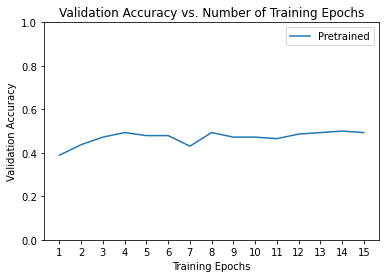

In [40]:
import matplotlib.pyplot as plt

ohist = [h.cpu().numpy() for h in hist]
plt.title("Validation Accuracy vs. Number of Training Epochs")
plt.xlabel("Training Epochs")
plt.ylabel("Validation Accuracy")
plt.plot(range(1,num_epochs+1),ohist,label="Pretrained")
plt.ylim((0,1.))
plt.xticks(np.arange(1, num_epochs+1, 1.0))
plt.legend()
plt.show()

In [42]:
model_ft = ViT(model_name, pretrained=True)
set_parameter_requires_grad(model_ft, feature_extracting=True, blocks=[])
num_ftrs = model_ft.fc.in_features
model_ft.fc = torch.nn.Linear(num_ftrs, train_dataset.num_labels)
input_size = 384

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model_ft = model_ft.to(device)

Loaded pretrained weights.


In [43]:
# Gather the parameters to be optimized/updated in this run. If we are
#  finetuning we will be updating all parameters. However, if we are
#  doing feature extract method, we will only update the parameters
#  that we have just initialized, i.e. the parameters with requires_grad
#  is True.

# TODO: try unfreezing the last few layers/blocks as well
print("Params to learn:")
params_to_update = []
for name,param in model_ft.named_parameters():
    if param.requires_grad == True:
        params_to_update.append(param)
        print("\t",name)


# Try the original transformer's optimizer
optimizer_ft = transformers.AdamW(params_to_update, lr=5e-5)

Params to learn:
	 fc.weight
	 fc.bias


In [44]:
criterion = torch.nn.CrossEntropyLoss()
train_dataset = TransformerTopCropDataset(train)
val_dataset = TransformerTopCropDataset(val)
test_dataset = TransformerTopCropDataset(test)
dataloaders_dict = {'train': torch.utils.data.DataLoader(train_dataset), 
                    'val': torch.utils.data.DataLoader(val_dataset), 
                    'test': torch.utils.data.DataLoader(test_dataset)}
# Train and evaluate
num_epochs = 15
model_ft, hist = train_model(model_ft, dataloaders_dict, criterion, optimizer_ft, num_epochs=num_epochs, is_inception=(model_name=="inception"))

Epoch 0/14
----------
train Loss: 1.9543 Acc: 0.2370
val Loss: 1.8218 Acc: 0.3125

Epoch 1/14
----------
train Loss: 1.7780 Acc: 0.3281
val Loss: 1.7484 Acc: 0.3264

Epoch 2/14
----------
train Loss: 1.7208 Acc: 0.3403
val Loss: 1.7043 Acc: 0.3472

Epoch 3/14
----------
train Loss: 1.6783 Acc: 0.3394
val Loss: 1.6752 Acc: 0.3681

Epoch 4/14
----------
train Loss: 1.6309 Acc: 0.3646
val Loss: 1.6496 Acc: 0.3750

Epoch 5/14
----------
train Loss: 1.6042 Acc: 0.3811
val Loss: 1.6337 Acc: 0.3819

Epoch 6/14
----------
train Loss: 1.6000 Acc: 0.3733
val Loss: 1.6125 Acc: 0.3889

Epoch 7/14
----------
train Loss: 1.5709 Acc: 0.4028
val Loss: 1.6020 Acc: 0.3889

Epoch 8/14
----------
train Loss: 1.5628 Acc: 0.4002
val Loss: 1.5899 Acc: 0.4028

Epoch 9/14
----------
train Loss: 1.5287 Acc: 0.4201
val Loss: 1.5789 Acc: 0.3889

Epoch 10/14
----------
train Loss: 1.5194 Acc: 0.4158
val Loss: 1.5803 Acc: 0.3958

Epoch 11/14
----------
train Loss: 1.5196 Acc: 0.4158
val Loss: 1.5605 Acc: 0.4028

Ep

In [45]:
torch.save(model_ft, "visual_transformer_mel_topcrop_stacked_freeze_layers_lr5e-5_AdamW.pt")

In [46]:
"""
model_ft = ViT(model_name, pretrained=True)
set_parameter_requires_grad(model_ft, feature_extracting=True, blocks=[])
num_ftrs = model_ft.fc.in_features
model_ft.fc = torch.nn.Linear(num_ftrs, train_dataset.num_labels)
input_size = 384

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model_ft = model_ft.to(device)
"""

criterion = torch.nn.CrossEntropyLoss()
train_dataset = TransformerTopCropDataset(train)
val_dataset = TransformerTopCropDataset(val)
test_dataset = TransformerTopCropDataset(test)
dataloaders_dict = {'train': torch.utils.data.DataLoader(train_dataset), 
                    'val': torch.utils.data.DataLoader(val_dataset), 
                    'test': torch.utils.data.DataLoader(test_dataset)}
# continue training above model for 30 epochs
num_epochs = 30
model_ft, hist = train_model(model_ft, dataloaders_dict, criterion, optimizer_ft, num_epochs=num_epochs, is_inception=(model_name=="inception"))

Epoch 0/29
----------
train Loss: 1.4472 Acc: 0.4583
val Loss: 1.5340 Acc: 0.4306

Epoch 1/29
----------
train Loss: 1.4417 Acc: 0.4505
val Loss: 1.5296 Acc: 0.4167

Epoch 2/29
----------
train Loss: 1.4451 Acc: 0.4670
val Loss: 1.5283 Acc: 0.3958

Epoch 3/29
----------
train Loss: 1.4192 Acc: 0.4627
val Loss: 1.5158 Acc: 0.4097

Epoch 4/29
----------
train Loss: 1.4220 Acc: 0.4818
val Loss: 1.5161 Acc: 0.4097

Epoch 5/29
----------
train Loss: 1.4123 Acc: 0.4774
val Loss: 1.5130 Acc: 0.4167

Epoch 6/29
----------
train Loss: 1.3940 Acc: 0.4939
val Loss: 1.5100 Acc: 0.4236

Epoch 7/29
----------
train Loss: 1.4011 Acc: 0.4731
val Loss: 1.5103 Acc: 0.4097

Epoch 8/29
----------
train Loss: 1.3918 Acc: 0.4714
val Loss: 1.5046 Acc: 0.4097

Epoch 9/29
----------
train Loss: 1.3780 Acc: 0.4861
val Loss: 1.5052 Acc: 0.4097

Epoch 10/29
----------
train Loss: 1.3786 Acc: 0.4878
val Loss: 1.4961 Acc: 0.4167

Epoch 11/29
----------
train Loss: 1.3631 Acc: 0.5104
val Loss: 1.4905 Acc: 0.3958

Ep

In [48]:
torch.save(model_ft, "visual_transformer_mel_topcrop_stacked_freeze_layers_lr5e-5_AdamW_45epoch.pt")

In [13]:
model_ft = ViT(model_name, pretrained=True)
set_parameter_requires_grad(model_ft, feature_extracting=True, blocks=[11])
num_ftrs = model_ft.fc.in_features
model_ft.fc = torch.nn.Linear(num_ftrs, train_dataset.num_labels)
input_size = 384

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model_ft = model_ft.to(device)

Loaded pretrained weights.


In [14]:
# Gather the parameters to be optimized/updated in this run. If we are
#  finetuning we will be updating all parameters. However, if we are
#  doing feature extract method, we will only update the parameters
#  that we have just initialized, i.e. the parameters with requires_grad
#  is True.

# TODO: try unfreezing the last few layers/blocks as well
print("Params to learn:")
params_to_update = []
for name,param in model_ft.named_parameters():
    if param.requires_grad == True:
        params_to_update.append(param)
        print("\t",name)


# Try the original transformer's optimizer
optimizer_ft = transformers.AdamW(params_to_update, lr=5e-5)

Params to learn:
	 transformer.blocks.11.attn.proj_q.weight
	 transformer.blocks.11.attn.proj_q.bias
	 transformer.blocks.11.attn.proj_k.weight
	 transformer.blocks.11.attn.proj_k.bias
	 transformer.blocks.11.attn.proj_v.weight
	 transformer.blocks.11.attn.proj_v.bias
	 transformer.blocks.11.proj.weight
	 transformer.blocks.11.proj.bias
	 transformer.blocks.11.norm1.weight
	 transformer.blocks.11.norm1.bias
	 transformer.blocks.11.pwff.fc1.weight
	 transformer.blocks.11.pwff.fc1.bias
	 transformer.blocks.11.pwff.fc2.weight
	 transformer.blocks.11.pwff.fc2.bias
	 transformer.blocks.11.norm2.weight
	 transformer.blocks.11.norm2.bias
	 fc.weight
	 fc.bias


In [15]:
criterion = torch.nn.CrossEntropyLoss()
train_dataset = TransformerTopCropDataset(train)
val_dataset = TransformerTopCropDataset(val)
test_dataset = TransformerTopCropDataset(test)
dataloaders_dict = {'train': torch.utils.data.DataLoader(train_dataset),#, batch_size=1), 
                    'val': torch.utils.data.DataLoader(val_dataset),#, batch_size=1), 
                    'test': torch.utils.data.DataLoader(test_dataset)}#, batch_size=1)}
# Train and evaluate
num_epochs = 30
model_ft, hist = train_model(model_ft, dataloaders_dict, criterion, optimizer_ft, num_epochs=num_epochs, is_inception=(model_name=="inception"))

Epoch 0/29
----------


KeyboardInterrupt: 